In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
data=pd.read_csv(r"C:\Users\Rahi\Downloads\Indian automoble buying behavour study 1.0.csv")

In [6]:
data.shape

(99, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [7]:
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [9]:
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [10]:
data.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
data.rename(columns={'Price':'Car_Price'},inplace=True)

In [11]:
data.columns=data.columns.str.replace(' ','_')

In [12]:
data.head()

,Age,Profession,Marrital_Status,Education,No_of_Dependents,Car_Loan,House_Loan,Wife_Working,Salary,Wife_Salary,Total_Salary,Make,Car_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [13]:
# Univariate Analysis
age_counts = data['Age'].value_counts()

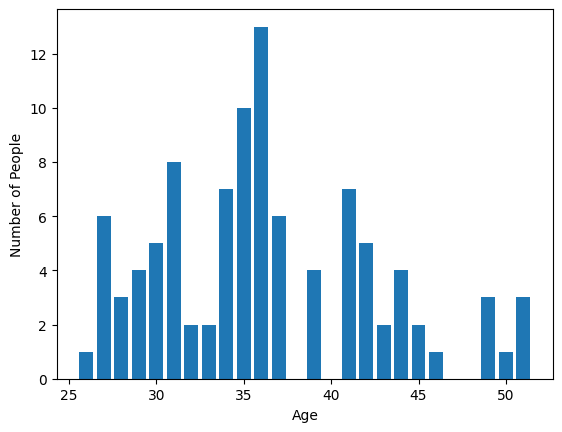

In [14]:
plt.bar(age_counts.index, age_counts.values)
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()

In [15]:
salary_count = data['Total_Salary'].value_counts()

In [16]:
salary_count.index

Index([1400000, 2000000, 2200000, 1900000, 2100000, 1600000, 1800000, 2600000,
        900000, 1300000, 2400000, 2700000,  800000, 1100000, 3100000, 3600000,
       2900000, 1700000, 2500000, 4500000, 4000000, 1500000, 2800000, 4900000,
       4100000, 5200000, 3200000, 3000000, 1200000, 4700000, 3800000, 4300000,
        200000, 2300000, 3700000, 5100000],
      dtype='int64', name='Total_Salary')

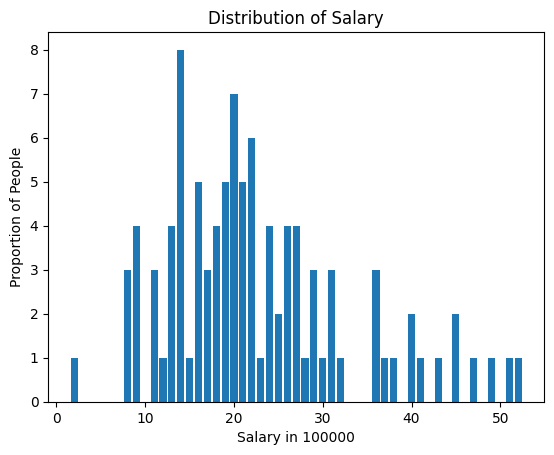

In [17]:
# Count the number of times each salary appears in the DataFrame
salary_counts = data["Total_Salary"].value_counts(normalize=True)

# Create a bar graph
plt.bar(salary_counts.index/100000, salary_count.values)
plt.xlabel("Salary in 100000")
plt.ylabel("Proportion of People")
plt.title("Distribution of Salary")

# Show the plot
plt.show()

In [18]:
Car_count = data['Car_Price'].value_counts()
Car_count

Car_Price
1600000    18
700000     18
1500000    16
800000     13
1200000    13
1100000    12
1300000     5
3000000     2
1000000     1
110000      1
Name: count, dtype: int64

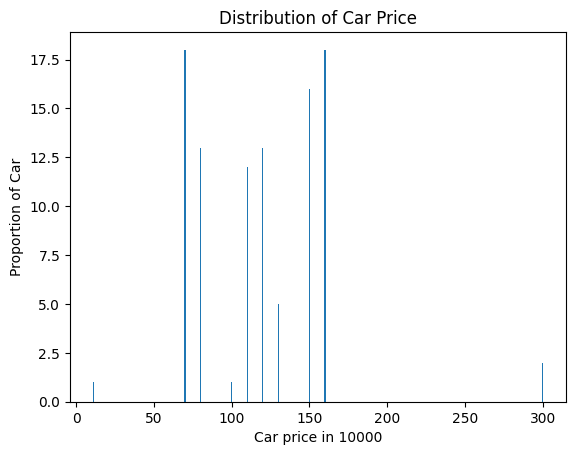

In [19]:
# Create a bar graph
plt.bar(Car_count.index/10000, Car_count.values)
plt.xlabel("Car price in 10000")
plt.ylabel("Proportion of Car")
plt.title("Distribution of Car Price")

# Show the plot
plt.show()

In [20]:
# Marital Status
data['Marrital_Status'].value_counts(normalize=True)

Marrital_Status
Married    0.848485
Single     0.151515
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of Marital Status'}, ylabel='proportion'>

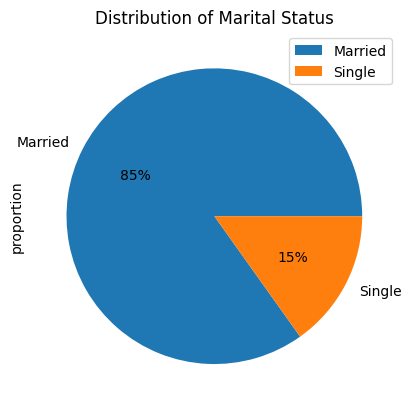

In [22]:
data['Marrital_Status'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',
                                                        legend=True,title='Distribution of Marital Status')

In [24]:
data['Education'].value_counts(normalize=True)

Education
Post Graduate    0.565657
Graduate         0.434343
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of Education'}, ylabel='proportion'>

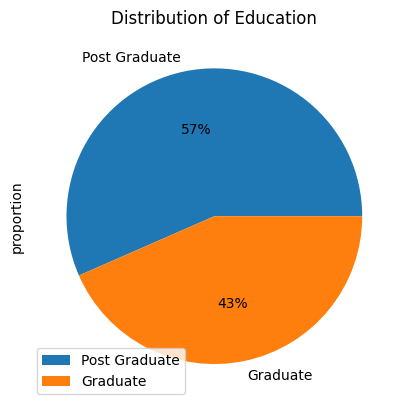

In [23]:
data['Education'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',
                                                  legend=True,title='Distribution of Education')

In [58]:
data['No_of_Dependents'].value_counts(normalize=True)

3    0.343434
2    0.292929
0    0.222222
4    0.141414
Name: No_of_Dependents, dtype: float64

<AxesSubplot:title={'center':'Distribution of No_of_Dependents'}, ylabel='No_of_Dependents'>

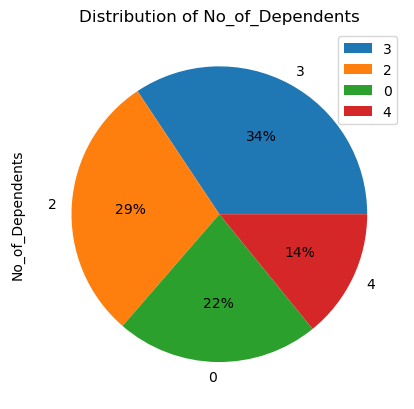

In [59]:
data['No_of_Dependents'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',
                                                         legend=True,title='Distribution of No_of_Dependents')

In [60]:
data['Car_Loan'].value_counts(normalize=True)

No     0.676768
Yes    0.323232
Name: Car_Loan, dtype: float64

<AxesSubplot:title={'center':'Distribution of Personal Loan'}, ylabel='Car_Loan'>

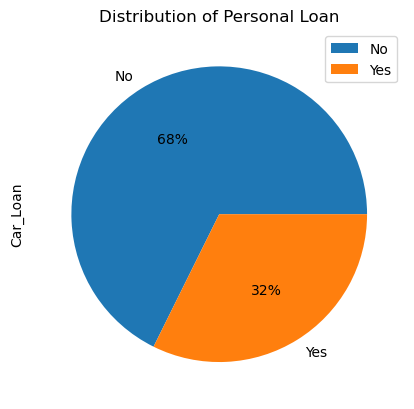

In [61]:
data['Car_Loan'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',
                                                 legend=True,title='Distribution of Personal Loan')

In [62]:
data['Profession'].value_counts(normalize=True)

Salaried    0.646465
Business    0.353535
Name: Profession, dtype: float64

<AxesSubplot:title={'center':'Distribution of Profession'}, ylabel='Profession'>

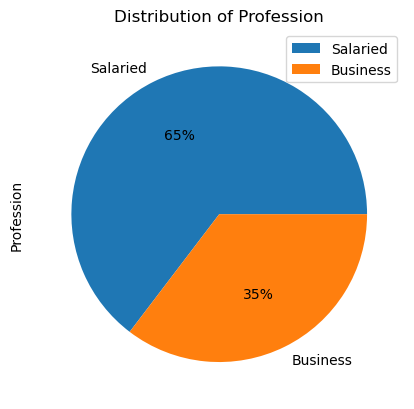

In [65]:
data['Profession'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',
                                                   legend=True,title='Distribution of Profession')

<AxesSubplot:xlabel='Total_Salary', ylabel='Car_Price'>

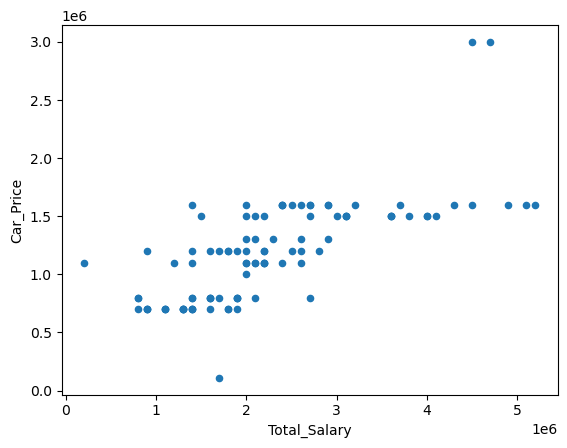

In [69]:
df.plot(kind='scatter',x='Total_Salary',y='Car_Price')

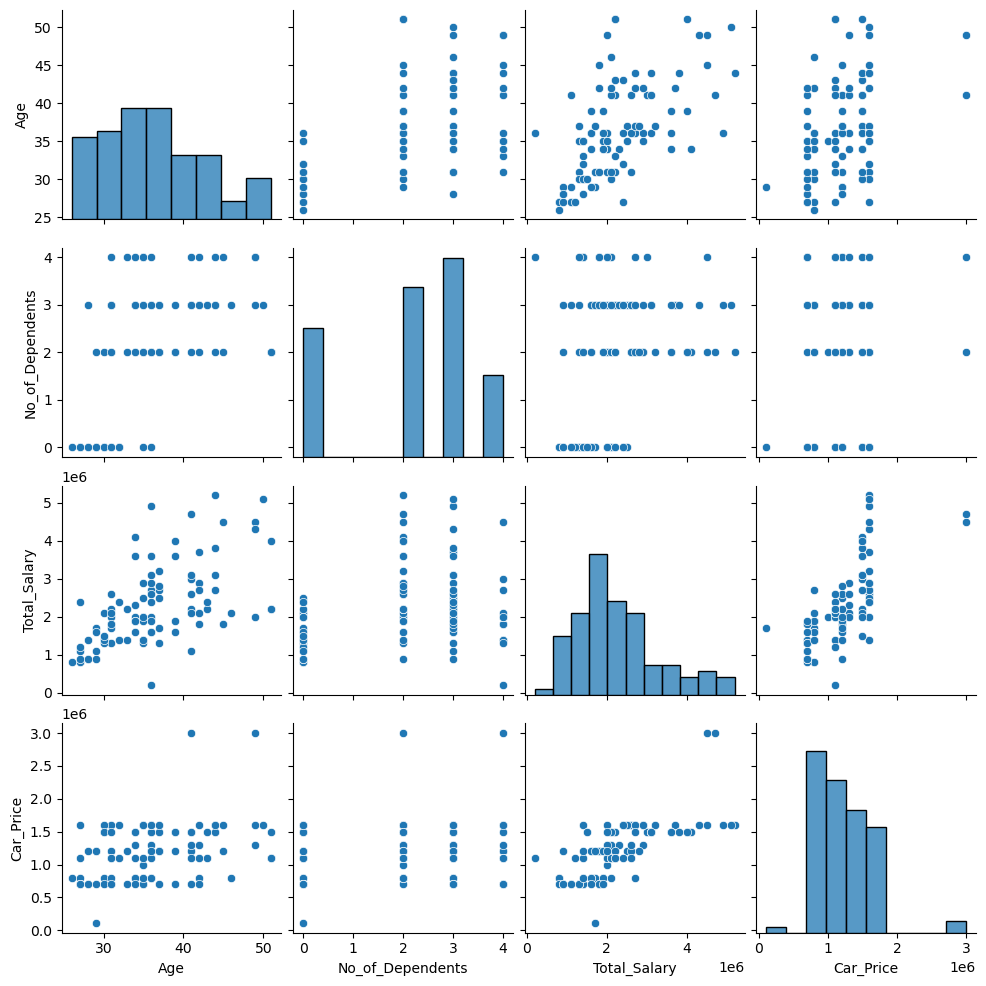

In [70]:
# Multivariate Analysis
sns.pairplot(df)

In [25]:
data.columns

Index(['Age', 'Profession', 'Marrital_Status', 'Education', 'No_of_Dependents',
       'Car_Loan', 'House_Loan', 'Wife_Working', 'Salary', 'Wife_Salary',
       'Total_Salary', 'Make', 'Car_Price'],
      dtype='object')

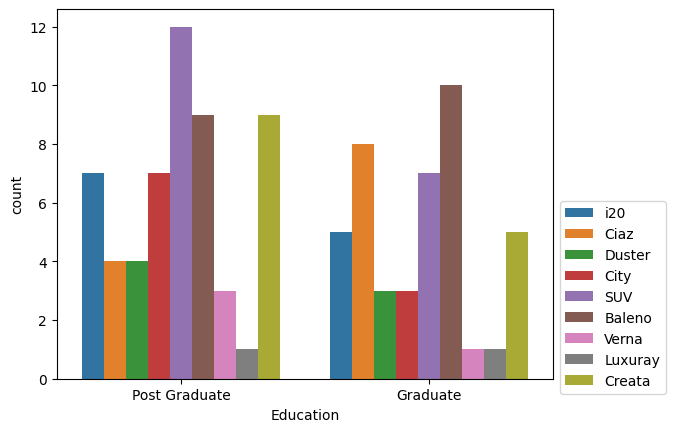

In [26]:
sns.countplot(x ='Education', hue = 'Make',  data = data,)# palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

<Axes: xlabel='Make', ylabel='count'>

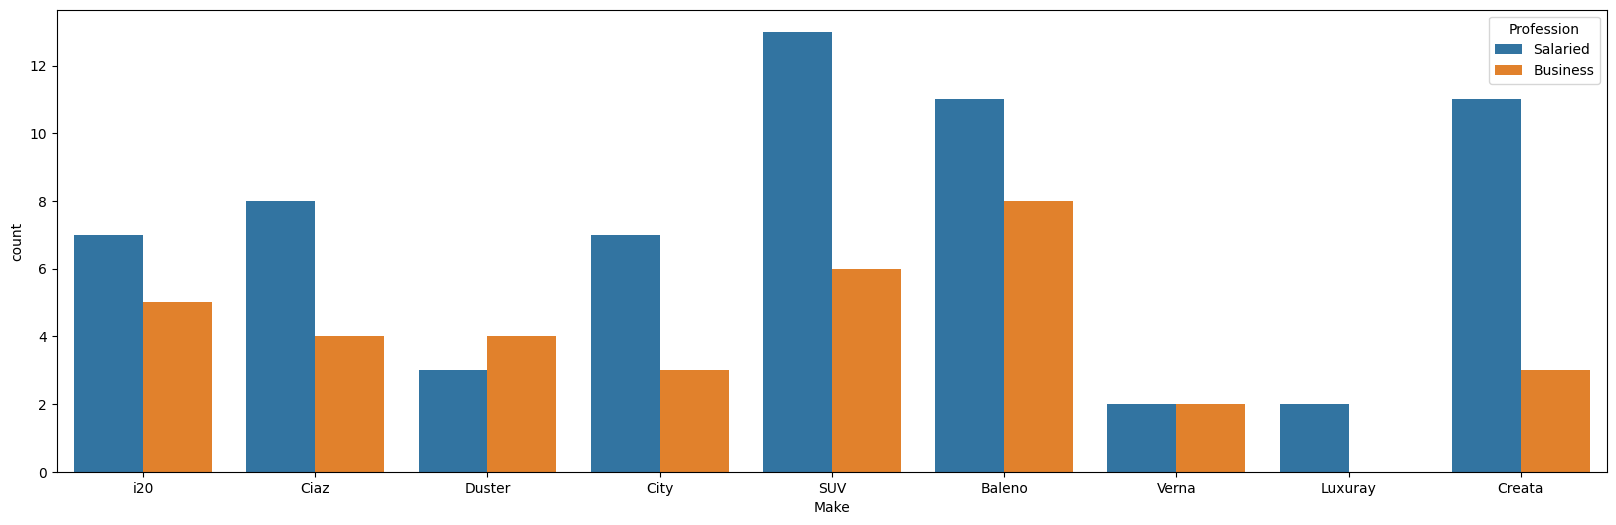

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Profession")

<Axes: xlabel='Make', ylabel='count'>

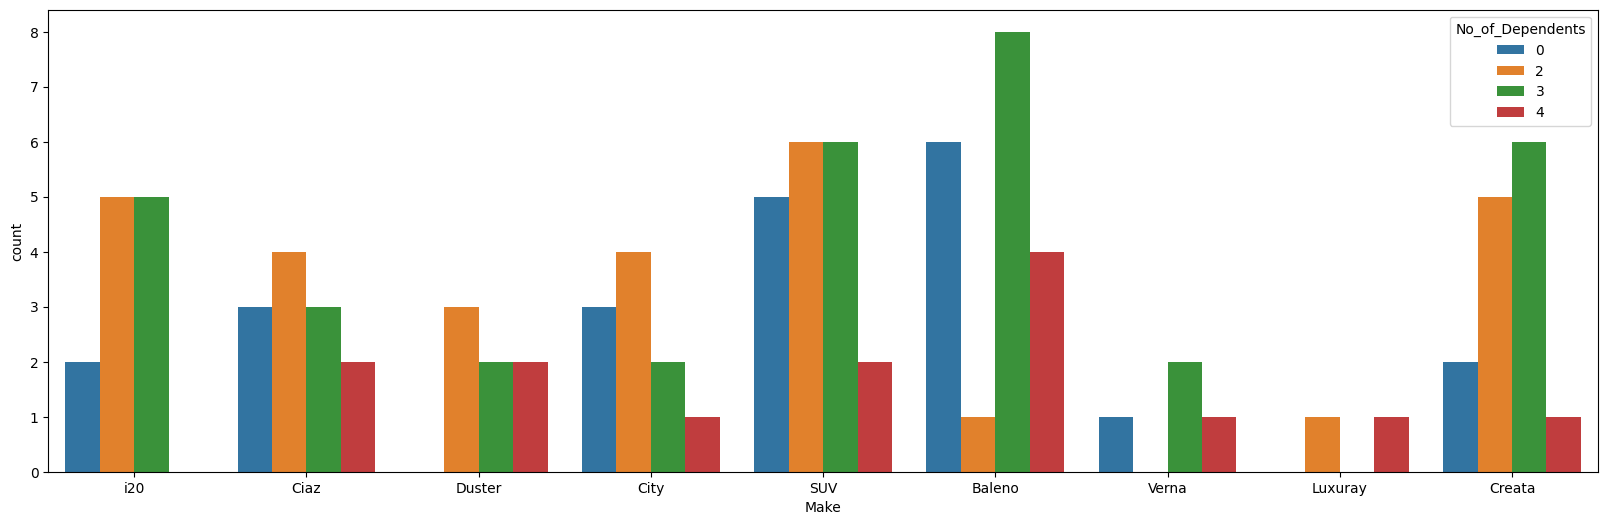

In [29]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="No_of_Dependents")

<Axes: xlabel='Make', ylabel='count'>

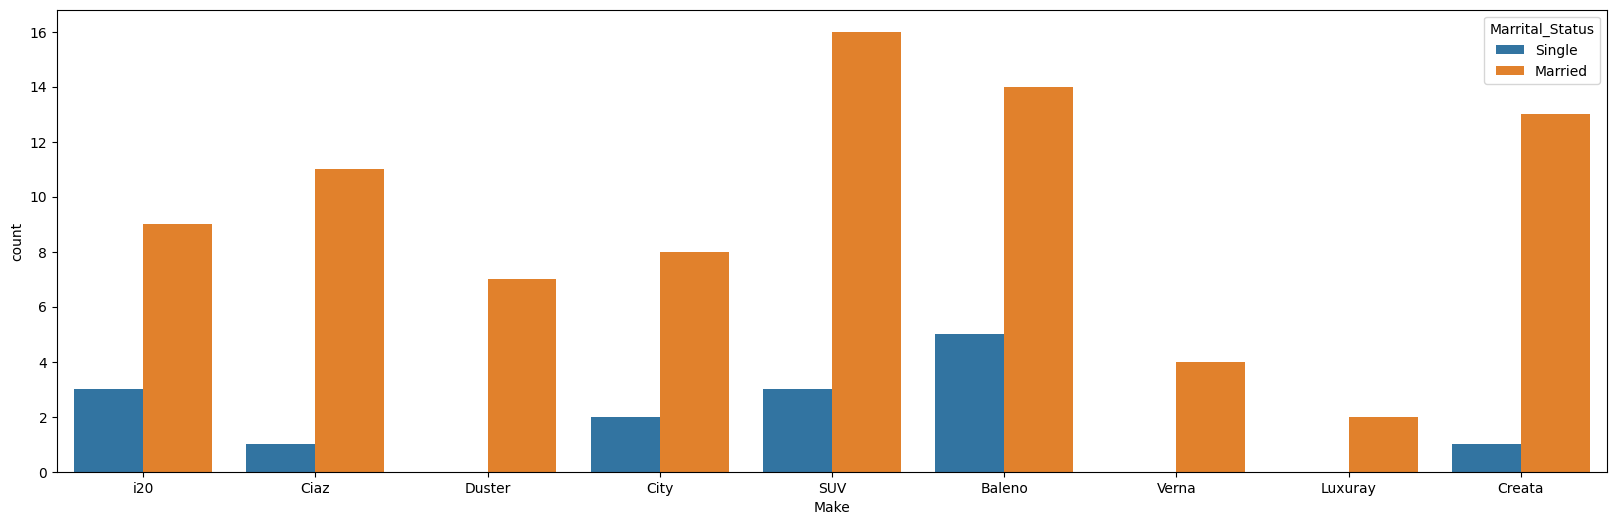

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Marrital_Status")

<Axes: xlabel='Age', ylabel='count'>

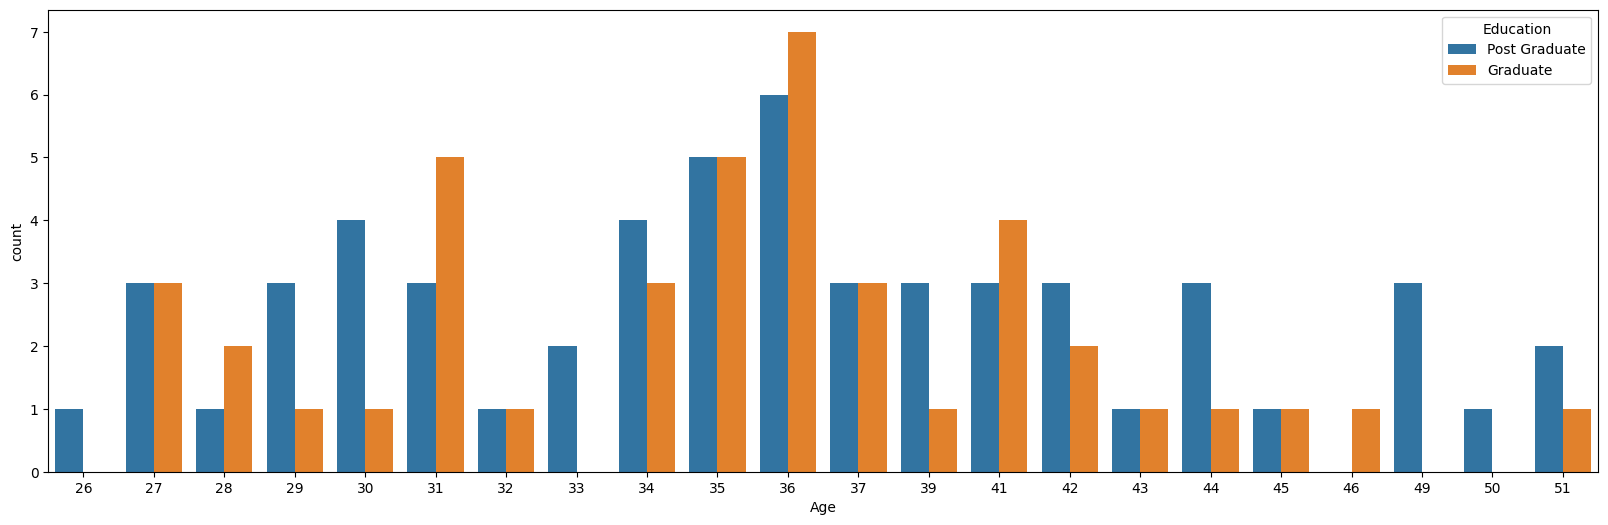

In [31]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=data, hue="Education")

# K Means Clustering

In [72]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

* Kmodes is similar to K means clustering when computing distance for continuous data using mean but for categorical data it uses the mode
* Frequency based dissimilarity measure. 
* Hence it is more preferrable for clustering multiple datatypes 

In [73]:
cluster_features = list(df.columns)
cluster_data = df[cluster_features].values

In [74]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

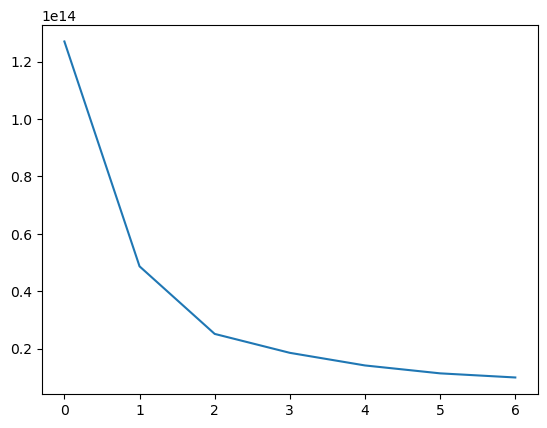

In [75]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [76]:
# fitting data to clusters

kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 0, ncost: 48616816198579.65
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 9, ncost: 50528143911238.56
Run: 2, iteration: 2/20, moves: 5, ncost: 48837287201079.53
Run: 2, iteration: 3/20, moves: 1, ncost: 48777842651066.98
Run: 2, iteration: 4/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 5, ncost: 50528143911238.56
Run: 3, iteration: 2/20, moves: 5, ncost: 48837287201079.53
Run: 3, iteration: 3/20, moves: 1, ncost: 48777842651066.98
Run: 3, iteration: 4/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 4, ncost: 49650723166357.79
Run:

In [77]:
# Appending the cluster data

data['Cluster'] = clusters

In [78]:
# Average cost of the EV
data.Car_Price.mean()

1194040.4040404041

In [79]:
# Average cost of a car in segment 1 
data.Car_Price[data.Cluster==0].mean()

1029305.5555555555

In [80]:
data['Car_Price'][data.Cluster==1].max()

3000000

In [81]:
# Average cost of a car in segment 1 
data.Car_Price[data.Cluster==1].mean()

1633333.3333333333

In [82]:
data['Cluster'].value_counts(normalize=True) * 100

0    72.727273
1    27.272727
Name: Cluster, dtype: float64

In [83]:
# Segregrating each cluster

Cluster_0 = data[data.Cluster==0]
Cluster_1 = data[data.Cluster==1]

In [84]:
data['Cluster'].value_counts()

0    72
1    27
Name: Cluster, dtype: int64

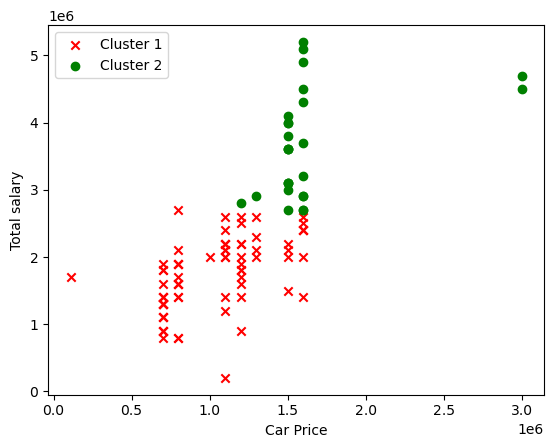

In [85]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.Car_Price, Cluster_0['Total_Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Car_Price, Cluster_1['Total_Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('Car Price')
plt.ylabel('Total salary')
plt.show()

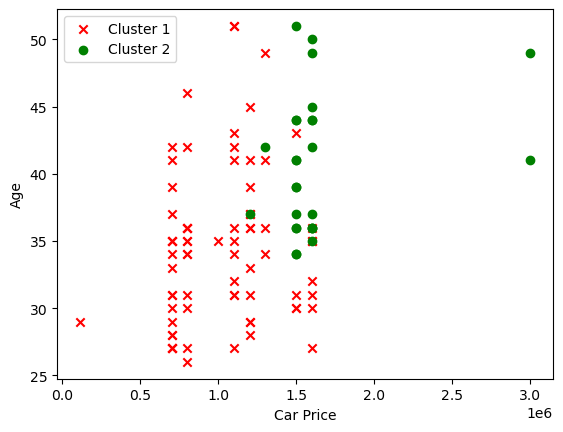

In [86]:
plt.scatter(Cluster_0.Car_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Car_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('Car Price')
plt.ylabel('Age')
plt.show()

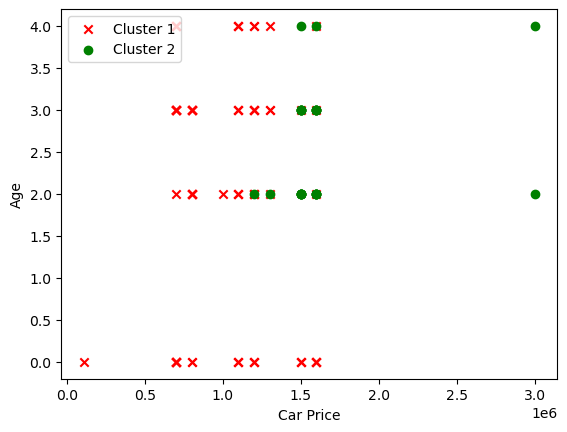

In [87]:
plt.scatter(Cluster_0.Car_Price, Cluster_0['No_of_Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Car_Price, Cluster_1['No_of_Dependents'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('Car Price')
plt.ylabel('Age')
plt.show()

In [88]:
from mpl_toolkits.mplot3d import Axes3D

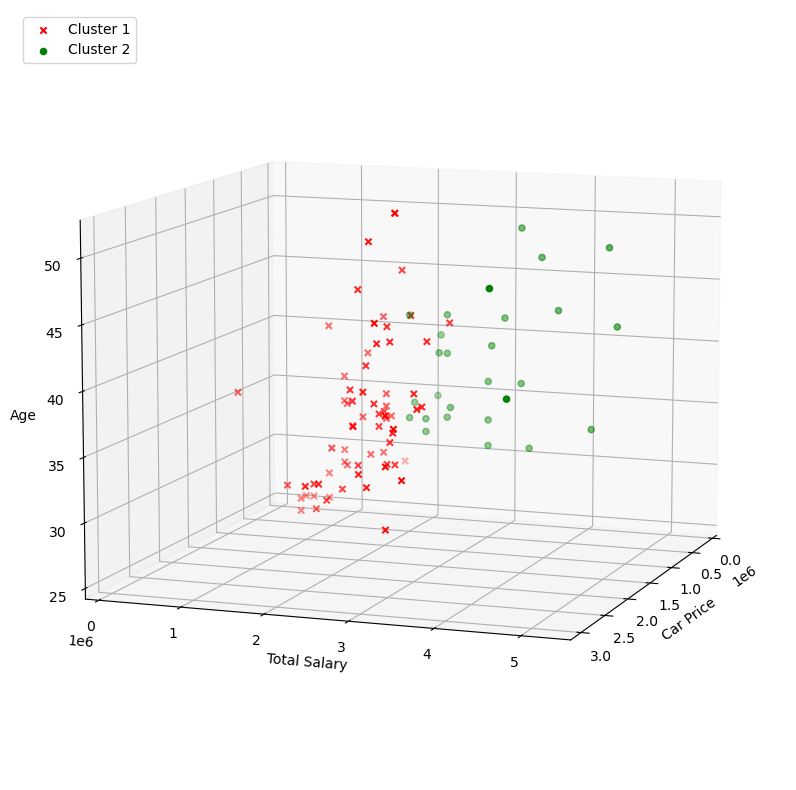

In [89]:
# plotting influence of age 

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Car_Price, Cluster_0['Total_Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.Car_Price, Cluster_1['Total_Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("Car Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

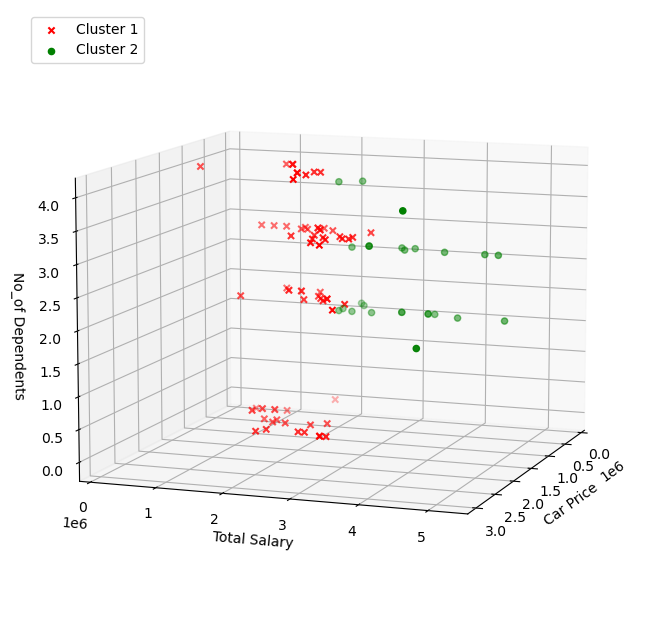

In [90]:
# plotting influence of age 

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Car_Price, Cluster_0['Total_Salary'], Cluster_0['No_of_Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.Car_Price, Cluster_1['Total_Salary'],Cluster_1['No_of_Dependents'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("Car Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No_of Dependents')
plt.show()